In [1]:
#Leandro Guerra
#www.outspokenmarket.com
#21/07/2018

#Loading Libraries
library(quantmod)
library(ggplot2)
library(data.table)
library(gridExtra)
library(fTrading)
library(TTR)
library(dplyr)

Loading required package: xts
Loading required package: zoo

Attaching package: 'zoo'

The following objects are masked from 'package:base':

    as.Date, as.Date.numeric

Loading required package: TTR
Version 0.4-0 included new data defaults. See ?getSymbols.

Attaching package: 'data.table'

The following objects are masked from 'package:xts':

    first, last

Loading required package: timeDate
Loading required package: timeSeries

Attaching package: 'timeSeries'

The following object is masked from 'package:zoo':

    time<-

Loading required package: fBasics


Rmetrics Package fBasics
Analysing Markets and calculating Basic Statistics
Copyright (C) 2005-2014 Rmetrics Association Zurich
Educational Software for Financial Engineering and Computational Science
Rmetrics is free software and comes with ABSOLUTELY NO WARRANTY.
https://www.rmetrics.org --- Mail to: info@rmetrics.org

Attaching package: 'fBasics'

The following object is masked from 'package:TTR':

    volatility


Attach

In [2]:

#Loading Data
EURUSD <- fread("D:/Projetos/LBI/Outspoken Market/EURUSD_H1_Hour.csv", sep = ";",header=T)
EURUSD <- as.data.frame(EURUSD)

head(EURUSD)

Time (CAT),Open,High,Low,Close,Pips,Pips_Shift
01/01/2015 00:00,1.20969,1.20976,1.20969,1.20976,0,0
01/01/2015 01:00,1.20976,1.20976,1.20976,1.20976,0,0
01/01/2015 02:00,1.20976,1.20976,1.20976,1.20976,0,0
01/01/2015 03:00,1.20976,1.20976,1.20976,1.20976,0,0
01/01/2015 04:00,1.20976,1.20976,1.20976,1.20976,0,0
01/01/2015 05:00,1.20976,1.20976,1.20976,1.20976,0,0


In [3]:
#Manipulating date to get hours and years
names(EURUSD)[1] <- "Date"
EURUSD$Hours <- substr(as.character(EURUSD$Date), 12, 13)
EURUSD$Hours <- as.numeric(EURUSD$Hours)
EURUSD$Year <- substr(as.character(EURUSD$Date), 7, 10)
head(EURUSD,5)

Date,Open,High,Low,Close,Pips,Pips_Shift,Hours,Year
01/01/2015 00:00,1.20969,1.20976,1.20969,1.20976,0,0,0,2015
01/01/2015 01:00,1.20976,1.20976,1.20976,1.20976,0,0,1,2015
01/01/2015 02:00,1.20976,1.20976,1.20976,1.20976,0,0,2,2015
01/01/2015 03:00,1.20976,1.20976,1.20976,1.20976,0,0,3,2015
01/01/2015 04:00,1.20976,1.20976,1.20976,1.20976,0,0,4,2015


In [4]:
#Creating more info
EURUSD$STD <- runSD(EURUSD$Close,15)                                          # I will explain it later on
EURUSD$RSI <- RSI(EURUSD$Close)                                              # I will explain it later on
EURUSD$CCI <- CCI(EURUSD[,c("High","Low","Close")])
EURUSD$CLV <- CLV(EURUSD[,c("High","Low","Close")])
EURUSD$VHF <- VHF(EURUSD[,"Close"])

EURUSD <- na.omit(EURUSD)
head(EURUSD,5)

,Date,Open,High,Low,Close,Pips,Pips_Shift,Hours,Year,STD,RSI,CCI,CLV,VHF
29,02/01/2015 04:00,1.20670,1.20687,1.20476,1.20588,-8.2,-7.1,4,2015,0.001395559,7.094876,-268.9198,0.06161137,0.9181034
30,02/01/2015 05:00,1.20586,1.20627,1.20552,1.20574,-1.4,-2.8,5,2015,0.001617777,6.836045,-196.5544,-0.41333333,0.9205021
31,02/01/2015 06:00,1.20574,1.20597,1.20492,1.20529,-4.5,3.2,6,2015,0.001823387,6.069567,-172.4746,-0.29523810,0.9273423
32,02/01/2015 07:00,1.20529,1.20555,1.20461,1.20517,-1.2,-4.5,7,2015,0.001972964,5.880227,-148.8883,0.19148936,0.9289720
33,02/01/2015 08:00,1.20517,1.20577,1.20485,1.20546,2.9,3.6,8,2015,0.002038003,12.947731,-116.2236,0.32608696,0.8812057


In [5]:
#Evaluating the variation in the number os pips per hour, from 2015 to 20/07/2018 and creating the plot
AcumHour <- data.frame(Pips=0, Hours=seq(0,23),stringsAsFactors=FALSE)
for(i in 0:23){
  AcumHour$Pips[i+1] = 100*sum(EURUSD[EURUSD$Hours==(i),]$Pips)
}

hist <- ggplot(data=AcumHour, aes(x=Hours, y=Pips)) +
          geom_bar(stat="identity") + ggtitle("Outspoken Market - Test of Hours Strategy") +
          xlab("") + ylab("2015 to 2018")

#2015
EUR2015 <- EURUSD[EURUSD$Year==2015,]

AcumHour <- data.frame(Pips=0,Hours=seq(0,23),stringsAsFactors=FALSE)

for(i in 0:23){
  AcumHour$Pips[i+1] = 100*sum(EUR2015[EUR2015$Hours==(i),]$Pips)
}

hist2015 <- ggplot(data=AcumHour, aes(x=Hours, y=Pips)) +
              geom_bar(stat="identity") +
              xlab("") + ylab("2015")

#2016
EUR2016 <- EURUSD[EURUSD$Year==2016,]

AcumHour <- data.frame(Pips=0,Hours=seq(0,23),stringsAsFactors=FALSE)

for(i in 0:23){
  AcumHour$Pips[i+1] = 100*sum(EUR2016[EUR2016$Hours==(i),]$Pips)
}

hist2016 <- ggplot(data=AcumHour, aes(x=Hours, y=Pips)) +
            geom_bar(stat="identity") +
            xlab("") + ylab("2016") 

#2017
EUR2017 <- EURUSD[EURUSD$Year==2017,]

AcumHour <- data.frame(Pips=0,Hours=seq(0,23),stringsAsFactors=FALSE)

for(i in 0:23){
  AcumHour$Pips[i+1] = 100*sum(EUR2017[EUR2017$Hours==(i),]$Pips)
}

hist2017<-ggplot(data=AcumHour, aes(x=Hours, y=Pips)) +
          geom_bar(stat="identity") +
          xlab("") + ylab("2017")

#2018
EUR2018 <- EURUSD[EURUSD$Year==2018,]

AcumHour <- data.frame(Pips=0,Hours=seq(0,23),stringsAsFactors=FALSE)

for(i in 0:23){
  AcumHour$Pips[i+1] = 100*sum(EUR2018[EUR2018$Hours==(i),]$Pips)
}

hist2018 <- ggplot(data=AcumHour, aes(x=Hours, y=Pips)) +
          geom_bar(stat="identity") +
          xlab("Hour GMT +1") + ylab("2018")

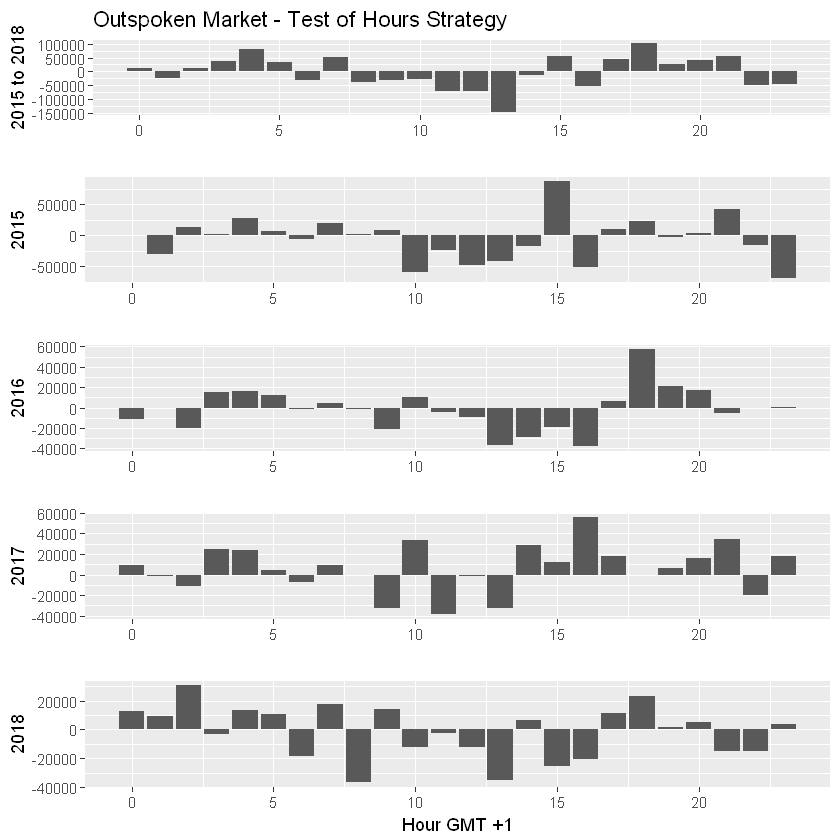

In [6]:
#Ploting the results
grid.arrange(hist,hist2015, hist2016, hist2017, hist2018, nrow = 5, ncol=1)

In [7]:
#There is a relevant negative accumulation of pips in the hours 8 and 13 and a positive one in the hours 18 and 19
#Lets create a simple and ilustrative strategy on it where:
    # Go short at 8am and 13 (1pm) GMT + 1
    # Go long at 18 (6pm) and 19 (7pm) GMT + 1

#Creating the Hours Strategy
pips_hours <- subset(EURUSD,
                   (EURUSD$Hours == 23) |      #sell
                     (EURUSD$Hours == 13)|    #sell
                     (EURUSD$Hours == 18) |   #buy
                     (EURUSD$Hours == 19)    #buy
                     )

#Adjusting the pips signal when the hours are to selling
pips_hours$Pips <- ifelse(pips_hours$Hours == "23",-1*pips_hours$Pips ,pips_hours$Pips )
pips_hours$Pips <- ifelse(pips_hours$Hours == "13",-1*pips_hours$Pips ,pips_hours$Pips )
cumulative_buy_pips <- cumsum(pips_hours$Pips)


In [8]:
#Evaluating strategy KPIs

#KPIs
Bull_wins_PIPS <- sum(pips_hours$Pips > 0)
Bull_losses_PIPS <- sum(pips_hours$Pips <= 0)
Bull_totalTrades_PIPS <- Bull_wins_PIPS + Bull_losses_PIPS
Bull_AVG_Win_PIPS <- mean(pips_hours[10][which(pips_hours$Pips > 0),])
Bull_AVG_Loss_PIPS <- -mean(pips_hours[10][which(pips_hours$Pips < 0),])
Bull_WL_Ratio_PIPS <- Bull_wins_PIPS/Bull_totalTrades_PIPS
Bull_EV_PIPS <- Bull_AVG_Win_PIPS*Bull_WL_Ratio_PIPS - Bull_AVG_Loss_PIPS*(1-Bull_WL_Ratio_PIPS)
Bull_PF_PIPS <- -sum(pips_hours[10][which(pips_hours$Pips > 0),])/sum(pips_hours[10][which(pips_hours$Pips < 0),])

SHARPE <- mean(pips_hours$Pips, na.rm = T)/sd(pips_hours$Pips, na.rm = T)
print ("Sharpe Ratio")
SHARPE
print ("W/L Ration")
Bull_WL_Ratio_PIPS
print ("Profit Factor")
Bull_PF_PIPS

#DrawDown PIPS
Bull_maxDD_PIPS <- maxDrawDown(cumulative_buy_pips)$maxdrawdown[1]
Bull_maxDD_duration_PIPS <-maxDrawDown(cumulative_buy_pips)$to - maxDrawDown(cumulative_buy_pips)$from[1]
print ("Max DD in Pips")
Bull_maxDD_PIPS
print ("Max DD Duration")
Bull_maxDD_duration_PIPS

[1] "Sharpe Ratio"


[1] 0.06862823

[1] "W/L Ration"


[1] 0.5163469

[1] "Profit Factor"


[1] -1.10353

[1] "Max DD in Pips"


[1] 688.9

[1] "Max DD Duration"


[1] 290

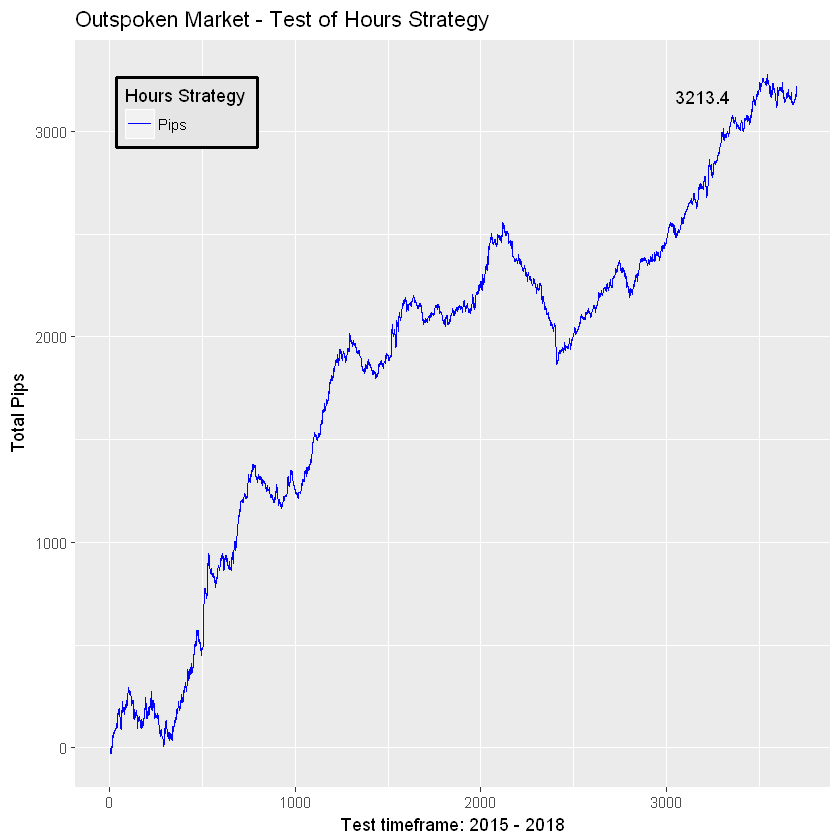

In [9]:
#Ploting Strategy Results - Only to illustrate the results. The strategy lacks of consistency verifications
df <- data.frame(seq.int(dim(pips_hours)[1]),cumulative_buy_pips)
g <- ggplot(df, aes(seq.int(dim(pips_hours)[1])))
g <- g + geom_line(aes(y=cumulative_buy_pips,linetype="Pips"), colour="blue")
g <- g + ggtitle("Outspoken Market - Test of Hours Strategy")+labs(x="Test timeframe: 2015 - 2018",
                                                                                      y="Total Pips") 
g <- g + annotate("text", x = dim(pips_hours)[1]-500, y = tail(cumulative_buy_pips,1)-45, label = paste(round(tail(cumulative_buy_pips,1),2)))
g <- g + theme(legend.position=c(.24, .95), legend.justification = c(1, 1),
               legend.background = element_rect(color = "black",fill = "grey90", size = 1, linetype = "solid")) + scale_shape_discrete(name="")
g <- g + labs(linetype="Hours Strategy")
g



In [10]:
#Don't forget: Strategies may look good until you add operational costs

#Simulating 0.5 and 1 pips of operational costs

costs1 <- 0.5
costs2 <- 1
pips_hours$Pips2 <- pips_hours$Pips-costs2
pips_hours$Pips <- pips_hours$Pips-costs1
cumulative_buy_pips <- cumsum(pips_hours$Pips)
cumulative_buy_pips2 <- cumsum(pips_hours$Pips2)

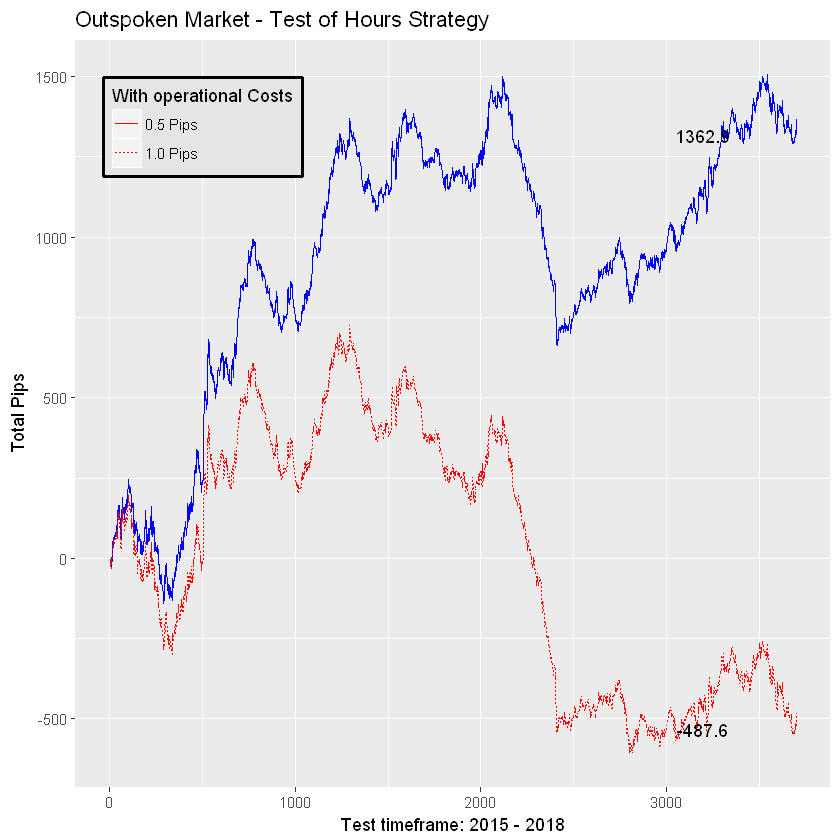

In [11]:
#Ploting Strategy Results not with operational costs - All is different now
df <- data.frame(seq.int(dim(pips_hours)[1]),cumulative_buy_pips)
g <- ggplot(df, aes(seq.int(dim(pips_hours)[1])))
g <- g + geom_line(aes(y=cumulative_buy_pips,linetype="0.5 Pips"), colour="blue")
g <- g + geom_line(aes(y=cumulative_buy_pips2,linetype="1.0 Pips"), colour="red")
g <- g + ggtitle("Outspoken Market - Test of Hours Strategy")+labs(x="Test timeframe: 2015 - 2018",
                                                                                      y="Total Pips") 
g <- g + annotate("text", x = dim(pips_hours)[1]-500, y = tail(cumulative_buy_pips,1)-45, label = paste(round(tail(cumulative_buy_pips,1),2)))
g <- g + annotate("text", x = dim(pips_hours)[1]-500, y = tail(cumulative_buy_pips2,1)-45, label = paste(round(tail(cumulative_buy_pips2,1),2)))
g <- g + theme(legend.position=c(.30, .95), legend.justification = c(1, 1),
               legend.background = element_rect(color = "black",fill = "grey90", size = 1, linetype = "solid")) + scale_shape_discrete(name="")
g <- g + labs(linetype="With operational Costs")
g



In [12]:
#How could we improve the strategy and make it profitable even with operational costs?
#Remember the elements Pip_Shift and STD that I mentioned in the begining?
#Let's use them as target and predictiors for a simple linear regression
set.seed(2016)
#Traning set - 20015 to 2017 data
pips_hours_traning <- subset(EURUSD,EURUSD$Year < 2018) 
#Test set - 2018
pips_hours_test <- subset(EURUSD,EURUSD$Year == 2018) 

linear1 = lm(Pips_Shift ~ STD + VHF + CCI + VHF*Hours + STD*RSI + Hours*STD + RSI*CCI*Hours , 
             data = pips_hours_traning)
summary(linear1)


Call:
lm(formula = Pips_Shift ~ STD + VHF + CCI + VHF * Hours + STD * 
    RSI + Hours * STD + RSI * CCI * Hours, data = pips_hours_traning)

Residuals:
    Min      1Q  Median      3Q     Max 
-317.75   -9.70   -0.03    9.80  296.28 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)   -2.261e+00  2.847e+00  -0.794   0.4272    
STD            1.949e+03  4.555e+02   4.279 1.89e-05 ***
VHF           -7.776e-01  3.488e+00  -0.223   0.8236    
CCI            5.121e-03  1.666e-02   0.307   0.7585    
Hours         -1.847e-02  2.043e-01  -0.090   0.9280    
RSI            4.944e-02  5.316e-02   0.930   0.3524    
VHF:Hours     -1.567e-01  2.761e-01  -0.568   0.5702    
STD:RSI       -3.565e+01  7.260e+00  -4.910 9.20e-07 ***
STD:Hours     -2.109e+01  2.025e+01  -1.042   0.2975    
CCI:RSI       -1.388e-04  3.049e-04  -0.455   0.6490    
Hours:RSI      9.975e-04  3.790e-03   0.263   0.7924    
CCI:Hours     -1.779e-03  1.177e-03  -1.511   0.1307    
CCI:Hour

In [13]:
#You can see that the linear regression is not good. However, could it still be profitable?
#Let's apply it to the data and find out
#In the end only the RSI variable has a decent significance level. In theory you can remove the other variables
#I will keep all for the simplicity of the example. Please try it removing and adding more variables :)

In [14]:
#Applying the linear regression to the data 

pips_hours_traning$linear1 = predict(linear1,pips_hours_traning)
pips_hours_test$linear1 = predict(linear1,pips_hours_test)

#Now let's not only run the regression, but discover the most profitable quantiles
q = quantile(pips_hours_traning$linear1, seq(0, 1, by = 0.05))
pips_hours_traning$qlinear <- cut(pips_hours_traning$linear1, q, include.lowest=TRUE)


Pips_qlinear <- aggregate(Pips_Shift ~ qlinear, data = pips_hours_traning, FUN = sum)
Pips_qlinear


qlinear,Pips_Shift
"[-21.1,-1.26]",-1488.6
"(-1.26,-0.885]",850.1
"(-0.885,-0.691]",-1558.4
"(-0.691,-0.558]",-258.9
"(-0.558,-0.448]",-1320.7
"(-0.448,-0.351]",-161.8
"(-0.351,-0.268]",-1692.7
"(-0.268,-0.194]",-815.2
"(-0.194,-0.126]",34.6
"(-0.126,-0.0624]",-191.2


In [15]:
#Creating the Linear Regression Strategy
pips_linear <- subset(pips_hours_test,
                   (pips_hours_test$linear1 <=  0) |      #sell
                     (pips_hours_test$linear1 > 0)    #buy
                     )

#Adjusting the pips signal when the hours are to selling
pips_linear$Pips_Shift <- ifelse(pips_linear$linear1 <=  0,-1*pips_linear$Pips_Shift ,pips_linear$Pips_Shift )
#Setting a Stop
pips_linear$Pips_Shift <- ifelse(pips_linear$Pips_Shift <=  -40,-41 ,pips_linear$Pips_Shift )
cumulative_buy_pips <- cumsum(pips_linear$Pips_Shift)
names(pips_linear)

[1] "Date"       "Open"       "High"       "Low"        "Close"     
 [6] "Pips"       "Pips_Shift" "Hours"      "Year"       "STD"       
[11] "RSI"        "CCI"        "CLV"        "VHF"        "linear1"

In [16]:
#Evaluating the Linear Regressoin Strategy KPIs

#KPIs
Bull_wins_PIPS <- sum(pips_linear$Pips_Shift > 0)
Bull_losses_PIPS <- sum(pips_linear$Pips_Shift <= 0)
Bull_totalTrades_PIPS <- Bull_wins_PIPS + Bull_losses_PIPS
Bull_AVG_Win_PIPS <- mean(pips_linear[7][which(pips_linear$Pips_Shift > 0),])
Bull_AVG_Loss_PIPS <- -mean(pips_linear[7][which(pips_linear$Pips_Shift < 0),])
Bull_WL_Ratio_PIPS <- Bull_wins_PIPS/Bull_totalTrades_PIPS
Bull_EV_PIPS <- Bull_AVG_Win_PIPS*Bull_WL_Ratio_PIPS - Bull_AVG_Loss_PIPS*(1-Bull_WL_Ratio_PIPS)
Bull_PF_PIPS <- -sum(pips_linear[7][which(pips_linear$Pips_Shift > 0),])/sum(pips_linear[11][which(pips_linear$Pips_Shift < 0),])

SHARPE <- mean(pips_linear$Pips_Shift, na.rm = T)/sd(pips_linear$Pips_Shift, na.rm = T)
print ("Sharpe Ratio")
SHARPE
print ("W/L Ration")
Bull_WL_Ratio_PIPS
print ("Profit Factor")
Bull_PF_PIPS

#DrawDown PIPS
Bull_maxDD_PIPS <- maxDrawDown(cumulative_buy_pips)$maxdrawdown[1]
Bull_maxDD_duration_PIPS <-maxDrawDown(cumulative_buy_pips)$to - maxDrawDown(cumulative_buy_pips)$from[1]
print ("Max DD in Pips")
Bull_maxDD_PIPS
print ("Max DD Duration")
Bull_maxDD_duration_PIPS

[1] "Sharpe Ratio"


[1] 0.06578172

[1] "W/L Ration"


[1] 0.5125832

[1] "Profit Factor"


[1] -0.3107868

[1] "Max DD in Pips"


[1] 907.9

[1] "Max DD Duration"


[1] 264 265

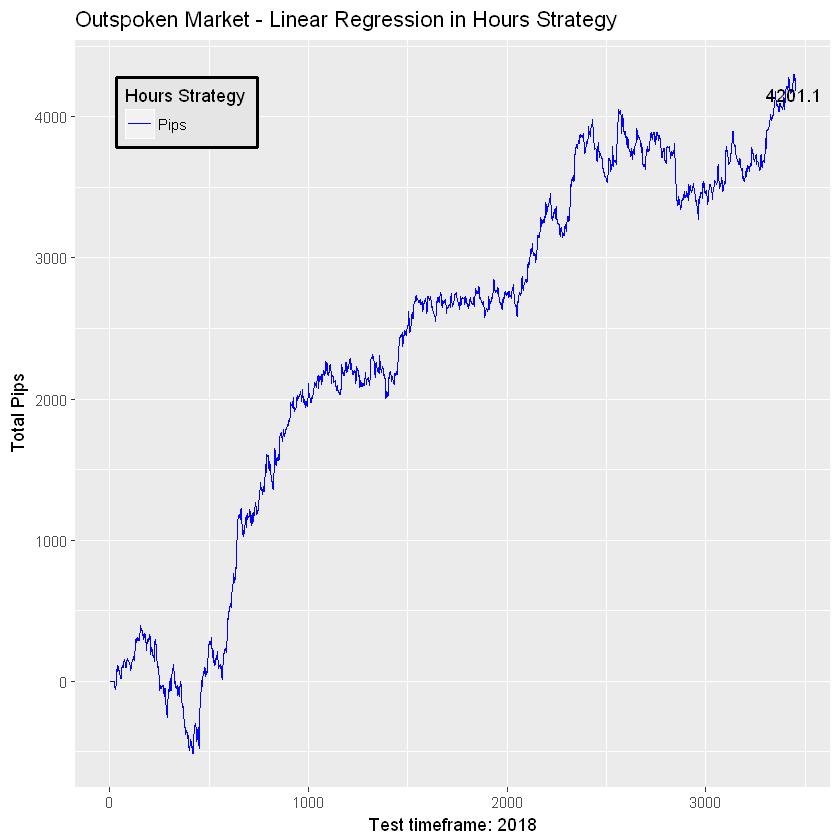

In [17]:
#Ploting Linear Regression Strategy Results - Only to illustrate the results. The strategy lacks of consistency verifications
df <- data.frame(seq.int(dim(pips_linear)[1]),cumulative_buy_pips)
g <- ggplot(df, aes(seq.int(dim(pips_linear)[1])))
g <- g + geom_line(aes(y=cumulative_buy_pips,linetype="Pips"), colour="blue")
g <- g + ggtitle("Outspoken Market - Linear Regression in Hours Strategy")+labs(x="Test timeframe: 2018",
                                                                                      y="Total Pips") 
g <- g + annotate("text", x = dim(pips_linear)[1]-10, y = tail(cumulative_buy_pips,1)-45, label = paste(round(tail(cumulative_buy_pips,1),2)))
g <- g + theme(legend.position=c(.24, .95), legend.justification = c(1, 1),
               legend.background = element_rect(color = "black",fill = "grey90", size = 1, linetype = "solid")) + scale_shape_discrete(name="")
g <- g + labs(linetype="Hours Strategy")
g


In [18]:
#Don't forget: Strategies may look good untill you add operational costs

#Simulating 0.5 and 1 pips of operational costs

costs1 <- 0.5
costs2 <- 1
pips_linear$Pips_Shift2 <- pips_linear$Pips_Shift-costs2
pips_linear$Pips_Shift <- pips_linear$Pips_Shift-costs1
cumulative_buy_pips <- cumsum(pips_linear$Pips_Shift)
cumulative_buy_pips2 <- cumsum(pips_linear$Pips_Shift2)

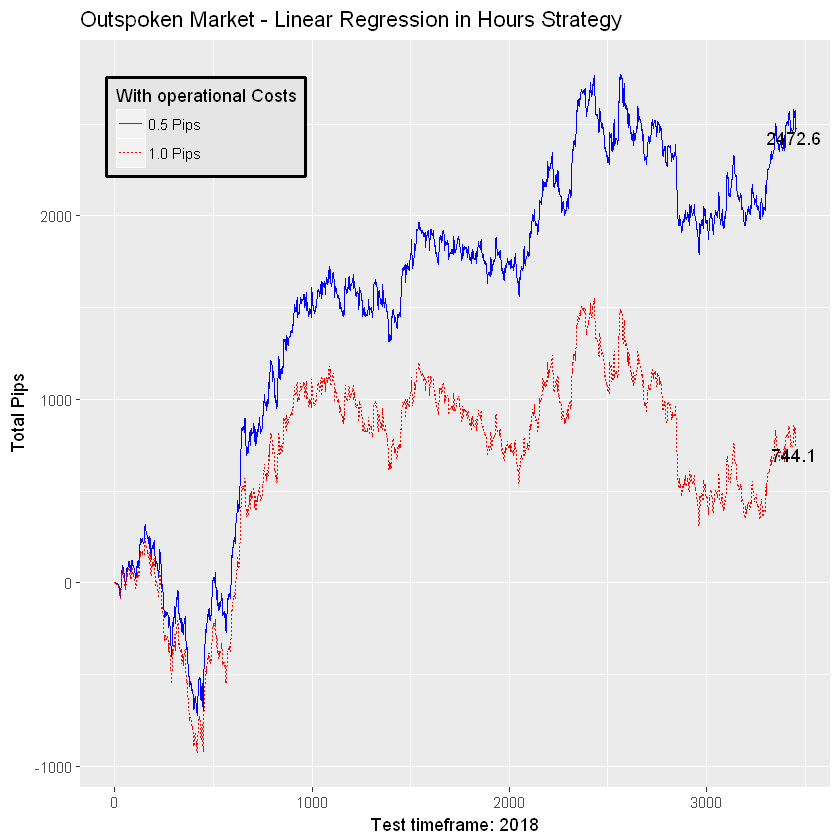

In [19]:
#Ploting Strategy Results not with operational costs - All is different now
df <- data.frame(seq.int(dim(pips_linear)[1]),cumulative_buy_pips)
g <- ggplot(df, aes(seq.int(dim(pips_linear)[1])))
g <- g + geom_line(aes(y=cumulative_buy_pips,linetype="0.5 Pips"), colour="blue")
g <- g + geom_line(aes(y=cumulative_buy_pips2,linetype="1.0 Pips"), colour="red")
g <- g + ggtitle("Outspoken Market - Linear Regression in Hours Strategy")+labs(x="Test timeframe: 2018",
                                                                                      y="Total Pips") 
g <- g + annotate("text", x = dim(pips_linear)[1]-10, y = tail(cumulative_buy_pips,1)-45, label = paste(round(tail(cumulative_buy_pips,1),2)))
g <- g + annotate("text", x = dim(pips_linear)[1]-10, y = tail(cumulative_buy_pips2,1)-45, label = paste(round(tail(cumulative_buy_pips2,1),2)))
g <- g + theme(legend.position=c(.30, .95), legend.justification = c(1, 1),
               legend.background = element_rect(color = "black",fill = "grey90", size = 1, linetype = "solid")) + scale_shape_discrete(name="")
g <- g + labs(linetype="With operational Costs")
g


In [ ]:
#Leandro Guerra - www.outspokenmarket.com